In [120]:
# imPORT LIBRARIES 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import pi, sqrt
import handcalcs.render
import pandas as pd
import json 
# !pip install handcalcs

In [121]:
# CONFIGURATIONS
#help(handcalcs.set_option)
handcalcs.set_option("latex_block_start", "$")
handcalcs.set_option("latex_block_end", "$")
handcalcs.set_option("math_environment_end", "aligned")
handcalcs.set_option("use_scientific_notation",True)

Extra Large Heat Sinks Aluminum 7.87" x2.71" x 1.41" / 200 x 69 x 36mm High Power Heatsink Diffusion Cooling Module Cooler 27 Fin Radiator for LED Light Amplifier Transistor Semiconductor PCB

https://www.amazon.com/Aluminum-Large-Heatsink-Sinks-Black/dp/B07TJZ2MYZ

Size: 200x69x36mm

<img src = "sink.jpg" width = 500>

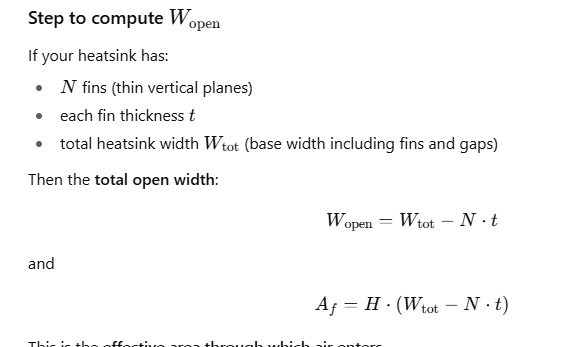

In [122]:
%%render 
H= 36
W=69
N = 27
t=(1+0.6)/2
A_f_mm = H*(W-N*t) # mm2
A_f = A_f_mm *1e-6 # m2

<IPython.core.display.Latex object>

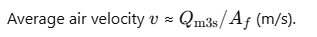

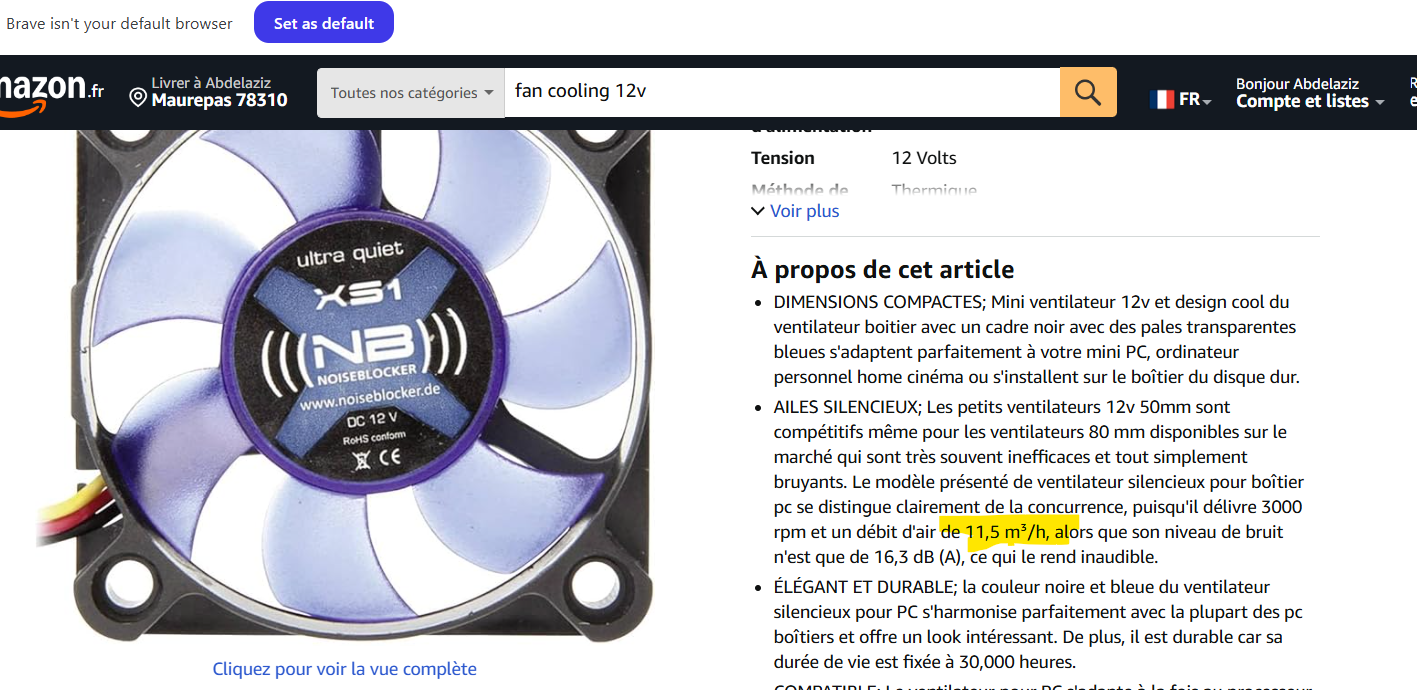

In [123]:
%%render 
Qmh = 11.5 # m3/h
Qmh = 30
Qms= Qmh /3600 # m3/s
v= Qms/A_f # m/s

<IPython.core.display.Latex object>

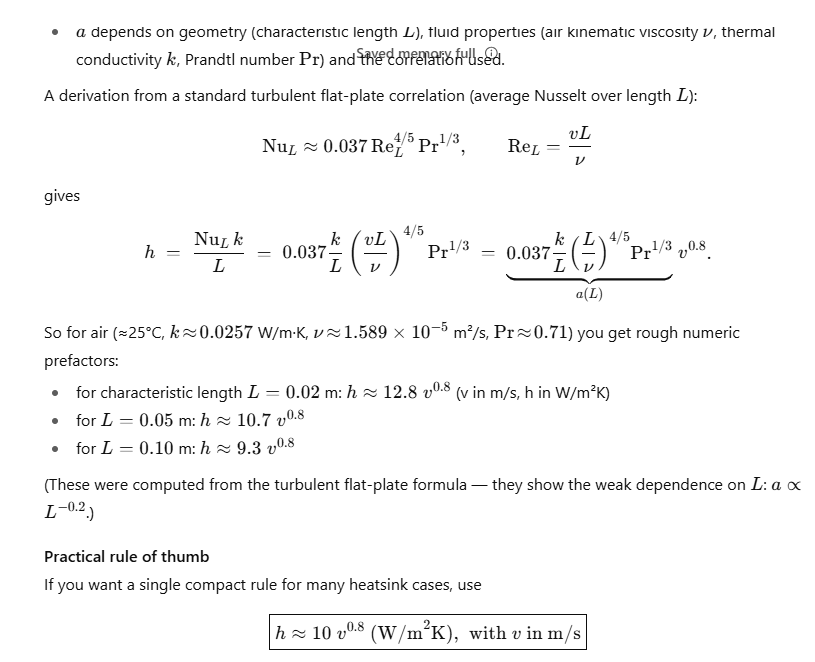

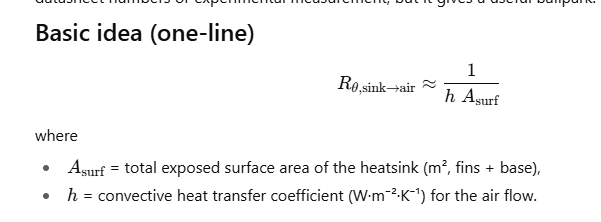

In [124]:
# Size: 200x69x36mm

In [125]:
%%render 
# heatsink dimensions in mm
base_W = 69.0
base_L = 200.0
base_H = 4.6
fin_H = 36.0 - base_H

# fin counts and thicknesses
fins = [(2,1.00),(25,0.60),(24,2.59),(2,3.12),(27,1.00)] # count, thickness
A_base = base_W*base_L
A_fins = sum(c*(2*fin_H*thick + 2*base_L*thick) for c,thick in fins) # two sides each fin
A_total = (A_base + A_fins)*1e-6 # convert mm² -> m²



<IPython.core.display.Latex object>

In [126]:
%%render 
h = 10*v**0.8 # W/m2K
Rth_SA = 1/(A_total*h) # K/W

<IPython.core.display.Latex object>

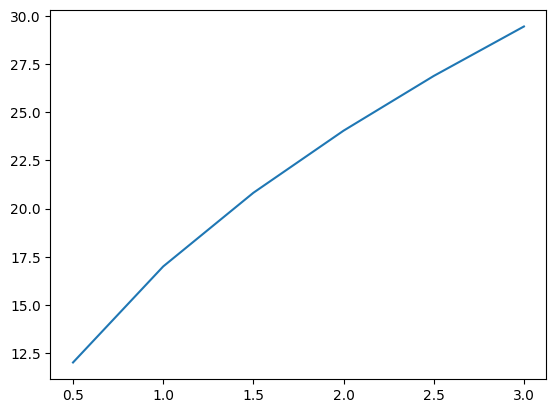

In [128]:
import numpy as np
v =np.arange(0.5,3.2,0.5)
h= 17*v**0.5
import matplotlib.pyplot as plt
plt.plot(v, h)

https://www.qats.com/cms/wp-content/uploads/2013/09/Qpedia_Oct08_How-Air-Velocity-Affects-HS-Performance.pdf

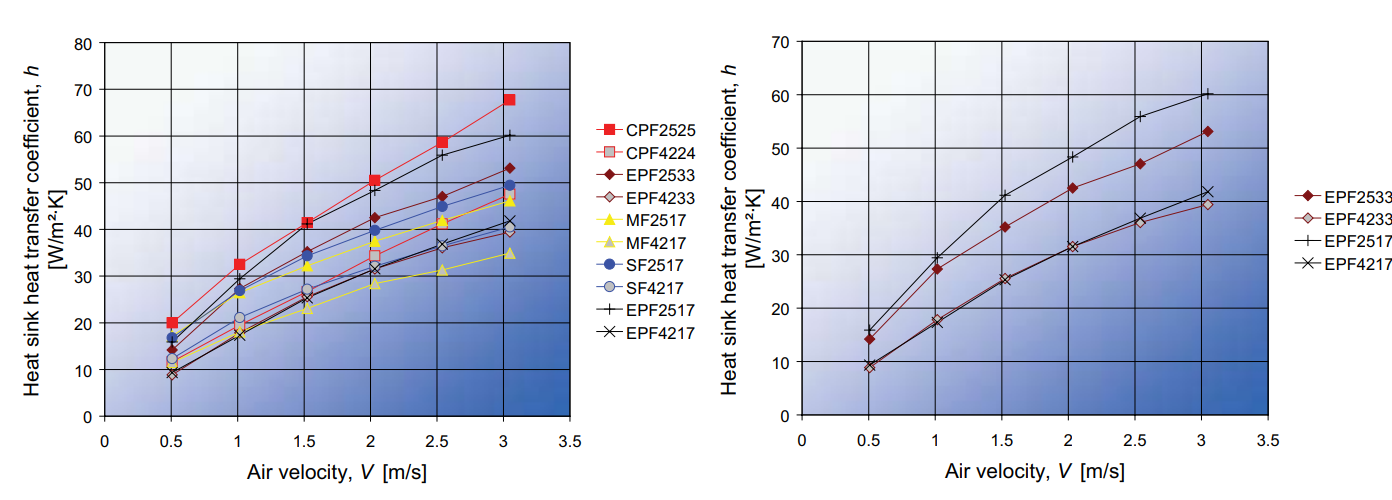

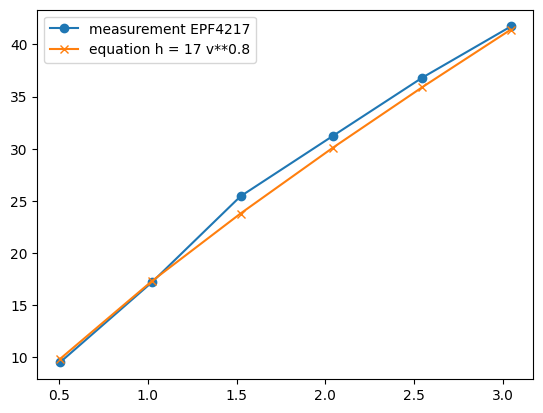

In [129]:
import matplotlib.pyplot as plt
import numpy as np
a="""Point,X,Y
1,0.5050400188982338,9.513194307043594
2,1.0240728961851908,17.214060509077783
3,1.5220639000686227,25.439985770341572
4,2.04109677735558,31.215635421867212
5,2.546101739040187,36.816265386982984
6,3.0440927429236186,41.71681660645928""".split("\n")
a= [x.split(",")[1:] for x in a[1:]]
v2, h2 = np.array(a).astype("float32").T
plt.plot(v2,h2, label = "measurement EPF4217", marker ="o")


#v =np.arange(0.5,3.2,0.5)
a=17
b=0.8
h= a*v2**b

plt.plot(v2, h,label = f"equation h = {a} v**{b}", marker="x")
plt.legend()

# precise formula

see 

https://www.heatsinkcalculator.com/blog/heat-sink-design-optimization-for-forced-convection/

NOKKKKKKKKK

<img src = "sink.jpg" width = 500>

In [130]:
%%render 
H= 36
W=69
N = 27
t=(1+0.6)/2
s= (W-N*t)/(N-1)
A_f_mm = H*(W-N*t) # mm2
A_f = A_f_mm *1e-6 # m2

<IPython.core.display.Latex object>

In [131]:
%%render 
Qmh = 11.5 # m3/h
Qmh = 30
Qms= Qmh /3600 # m3/s
v= Qms/A_f # m/s
Vp= Qms

<IPython.core.display.Latex object>

In [132]:
Hf= H
Nf= N

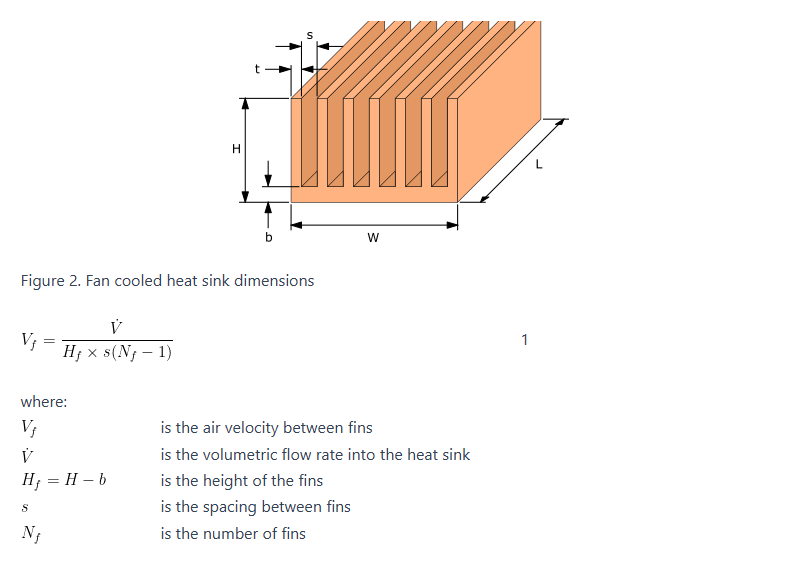

In [133]:
L = 200

In [134]:
%%render 
Vf= Vp/(1e-6*Hf*s*(Nf-1)) # m/s

<IPython.core.display.Latex object>

In [135]:
%%render 
S_opt= s*1e-3 # m 

<IPython.core.display.Latex object>

In [136]:
Pr= 0.71 # Prandtl number for air.

**Air at 20 °C:**

- Dynamic viscosity:  
  $
  \mu \approx 1.8 \times 10^{-5} \,\text{Pa·s}
  $

- Density:  
  $
  \rho \approx 1.2 \,\text{kg/m}^3
  $

  $v= \mu/\rho$


In [137]:
%%render 
mu = 1.8e-5
rho = 1.2
v = mu/rho # kinematic viscosity. 

<IPython.core.display.Latex object>

In [138]:
%%render 
Res= Vf*S_opt*1e-3/v
Resp= Res*S_opt/L

<IPython.core.display.Latex object>

In [139]:
%%render 
Nui = (  (Resp*Pr/2)**-3 + (0.664*sqrt(Resp)*Pr**(1/3)*sqrt(1+3.65/sqrt(Resp))      )**-3   )**(-1/3)

<IPython.core.display.Latex object>

In [140]:
from math import tanh 

In [141]:
t, L

(0.8, 200)

In [142]:
k= 0.025 # W/m*k #  k is the thermal conductivity of air.
kf = k # à verifier apres 

In [143]:
%%render 
Ahs = L*(S_opt+2*Hf)*(Nf-1)*1e-6 # m2

<IPython.core.display.Latex object>

In [144]:
%%render 
A= sqrt(2*Nui*k*Hf*Hf/(kf*S_opt*t)) *(t/L+1)
Nus =   (tanh( A   ) /  A  ) * Nui
hf = Nus*k/(S_opt*1e-3)
#hf=10
Rth1 = 1/(hf*Ahs)

<IPython.core.display.Latex object>

In [145]:
k= 0.025 # W/m*k #  k is the thermal conductivity of air.

This is nooooooooooooooooooook nokkkkkkkkkkkkk 

why because Rth2 suppose that we have an insulation by air of H = b and S= H*L is nokkkkkkkkk

we must work with thermal conductivity of aluminuim not air cond 

In [146]:
%%render 
k= 0.025 
b=4.6
Rth2 = 1e-3*b/(k*W*L*1e-6)

<IPython.core.display.Latex object>

In [147]:
%%render 
k_alum = 237 
b=4.6
Rth2 = 1e-3*b/(k_alum*W*L*1e-6)

<IPython.core.display.Latex object>

In [148]:
# now is correct 

Text(0, 0.5, 'hf')

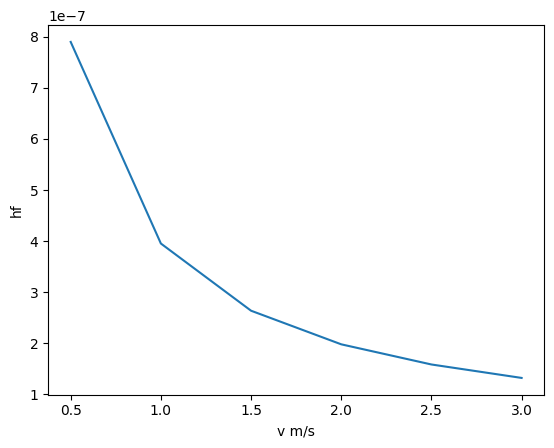

In [149]:
v= np.arange(0.5,3.1,0.5)
Res= Vf*S_opt*1e-3/v
Resp= Res*S_opt/L


 
Nui = (  (Resp*Pr/2)**-3 + (0.664*np.sqrt(Resp)*Pr**(1/3)*np.sqrt(1+3.65/np.sqrt(Resp))      )**-3   )**(-1/3)

 
A= np.sqrt(2*Nui*k*Hf*Hf/(kf*S_opt*t)) *(t/L+1)
Nus =   (np.tanh( A   ) /  A  ) * Nui
hf = Nus*k/(S_opt*1e-3)
plt.plot(v, hf)
plt.xlabel("v m/s")
plt.ylabel ("hf")

In [150]:
#Nokkkkkkkkkkk
# with this 

Text(0, 0.5, 'hf')

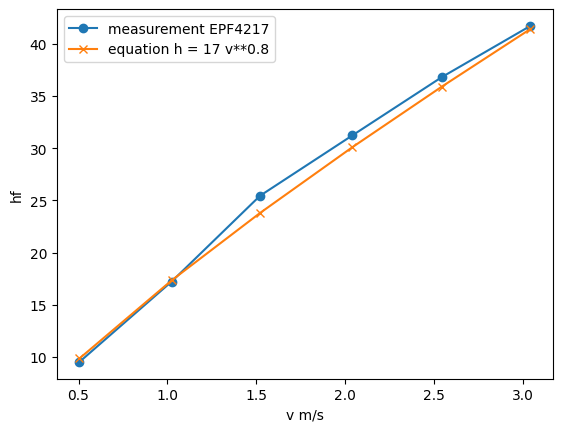

In [151]:
import matplotlib.pyplot as plt
import numpy as np
a="""Point,X,Y
1,0.5050400188982338,9.513194307043594
2,1.0240728961851908,17.214060509077783
3,1.5220639000686227,25.439985770341572
4,2.04109677735558,31.215635421867212
5,2.546101739040187,36.816265386982984
6,3.0440927429236186,41.71681660645928""".split("\n")
a= [x.split(",")[1:] for x in a[1:]]
v2, h2 = np.array(a).astype("float32").T
plt.plot(v2,h2, label = "measurement EPF4217", marker ="o")


#v =np.arange(0.5,3.2,0.5)
a=17
b=0.8
h= a*v2**b

plt.plot(v2, h,label = f"equation h = {a} v**{b}", marker="x")
plt.legend()
plt.xlabel("v m/s")
plt.ylabel ("hf")

In [152]:
# chat gpt4

In [153]:
import numpy as np
def heat_sink_Rth(W, s, t, H, b, L, V_inf,
                  mu=1.8e-5, rho=1.2, k=0.025, Pr=0.71):
    """
    Calculate thermal resistance R_hs of a plate-fin heat sink.
    
    Parameters (dimensions in meters and SI units):
      W, s, t, H, b, L – in m
      V_inf – approach air speed in m/s
      mu – dynamic viscosity (Pa·s)
      rho – air density (kg/m³)
      k – thermal conductivity of air (W/m·K)
      Pr – Prandtl number (dimensionless)
    
    Returns:
      R_hs (K/W)
    """
    # Derived physical quantities
    A_frontal = H * (W / (s + t)) * L     # frontal area
    V_f = V_inf * (W * L) / ( (W / (s + t)) * s * L )
    Re = rho * V_f * (2 * s) / mu

    # Empirical friction & loss coefficients (simplified model)
    sigma = s / (s + t)
    Kc = Ke = 0.5 * (1 - sigma)  # basic approximation
    Dh = 2 * s
    f_app = 64 / Re if Re > 0 else 0.0

    # Pressure drop across heat sink (eq.3)
    deltaP_hs = (f_app * (H / Dh) + Kc + Ke) * (rho * V_f**2 / 2)

    # Average heat transfer coefficient hf (simplified convection Nusselt)
    Nu = 0.664 * Re**0.5 * Pr**0.33  # laminar flat plate analogy
    hf = Nu * k / (2 * s)

    # Wetted surface area (simplified): fins + base
    A_hs = 2 * H * L * (W / (s + t)) + W * L

    # Thermal resistance R_hs (eq.15)
    R_hs = 1 / (hf * A_hs)

    return R_hs, V_f, Re, deltaP_hs,hf

# Example usage:
# Convert inputs from mm to m
params_mm = dict(W=100, s=2, t=1, H=25, b=2, L=50)
params_m = {k: v / 1000 for k, v in params_mm.items()}
R_hs, V_f, Re, deltaP , _= heat_sink_Rth(**params_m, V_inf=2.0)

print(f"R_hs = {R_hs:.3e} K/W")
print(f"Velocity between fins V_f = {V_f:.3f} m/s")
print(f"Reynolds number Re = {Re:.1f}")
print(f"Pressure drop ΔP_hs = {deltaP:.1f} Pa")
R_hs

R_hs = 1.080e-01 K/W
Velocity between fins V_f = 3.000 m/s
Reynolds number Re = 800.0
Pressure drop ΔP_hs = 4.5 Pa


0.10798589584000319

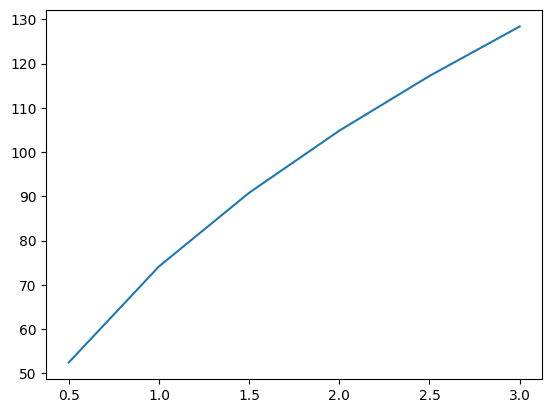

In [154]:
arr= []
for x in v: 
    R_hs, V_f, Re, deltaP,hf = heat_sink_Rth(**params_m, V_inf=x)
    arr.append(hf)
plt.plot(v, np.array(arr))

In [155]:
### chatgpt5

In [156]:
import math
from dataclasses import dataclass

@dataclass
class AirProps:
    """Air properties at film temperature (default ~25–40°C typical for electronics).
    You can override if you want T-dependent properties."""
    rho: float = 1.18      # kg/m^3 (density at ~25°C)
    mu: float  = 1.85e-5   # Pa·s (dynamic viscosity)
    k: float   = 0.026     # W/m·K (thermal conductivity)
    cp: float  = 1007.0    # J/kg·K (specific heat)
    pr: float = None       # Prandtl number; if None, computed from mu*cp/k

    def __post_init__(self):
        if self.pr is None:
            self.pr = self.mu * self.cp / self.k  # ~0.71 at ~25°C


def _mm_to_m(*vals):
    return [v / 1000.0 for v in vals]


def plate_fin_heatsink_rth(
    W_mm, s_mm, t_mm, H_mm, b_mm, L_mm,
    v_air,                         # air speed (m/s)
    speed_type="channel",          # 'channel' (velocity between fins) or 'approach' (face velocity)
    air: AirProps = AirProps(),    # air properties
    k_fin=200.0,                   # W/m·K (aluminum ~200 W/m·K)
    k_base=200.0,                  # W/m·K (usually same as fin if one-piece)
    safety_min_channels=1
):
    """
    Compute heat sink thermal resistance R_th [K/W] for a shrouded plate-fin heat sink under forced convection.

    Geometry (all in mm):
      W : overall width across the fins (transverse to flow)
      s : fin spacing (channel gap)
      t : fin thickness
      H : fin height
      b : base thickness
      L : fin length (flow direction)

    v_air:
      If speed_type='channel': average velocity inside channels [m/s].
      If speed_type='approach': approach face velocity at the heat-sink inlet [m/s].
      In the latter case, continuity is used to convert to channel velocity assuming no bypass.

    Returns dict with:
      R_total_K_per_W : Total thermal resistance base-to-inlet-air [K/W]
      R_conv_K_per_W  : Convection-only part [K/W]
      R_base_K_per_W  : Base conduction part [K/W]
      h_W_m2K         : Average convective heat transfer coefficient on fins/base [W/m^2·K]
      Re              : Channel Reynolds number
      Nu              : Nusselt number used
      eta_fin         : Fin efficiency
      n_fins          : Number of fins
      n_channels      : Number of channels
      v_channel_m_s   : Channel velocity actually used [m/s]
    """
    # Convert geometry to meters
    W, s, t, H, b, L = _mm_to_m(W_mm, s_mm, t_mm, H_mm, b_mm, L_mm)

    # Fin count and channels (assume W ≈ N_fins*t + (N_fins - 1)*s)
    n_fins = max(2, int((W + s) // (s + t)))  # at least 2 fins to form channels
    n_channels = max(safety_min_channels, n_fins - 1)

    # Channel (between fins) hydraulic diameter ~ 2*s for parallel plates
    Dh = 2.0 * s  # m
    # Convert approach velocity (face) to in-channel velocity via continuity:
    # Vdot_in = v_app * (W * H)  (no bypass) = v_ch * (H * s * n_channels)  => v_ch = v_app * W / (s * n_channels)
    if speed_type.lower() == "approach":
        v_channel = v_air * (W / (s * n_channels))
    else:
        v_channel = v_air

    # Dimensionless groups
    Re = air.rho * v_channel * Dh / air.mu
    Pr = air.pr

    # ---- Average Nusselt number (laminar, composite developing + fully-developed) ----
    # We use a composite Churchill–Usagi-style blend for a parallel-plate channel, as in the Teertstra/Yovanovich model:
    #   Nu = [ (Nu_dev)^(-n) + (Nu_fd)^(-n) ]^(-1/n), n ≈ 3
    # with Nu_fd (isothermal parallel plates, thermally fully developed) ≈ 7.541
    # and an entrance/developing term that scales with (Re·Pr·Dh/L)^(1/3).
    # This follows the approach described in Teertstra et al. and the Electronics Cooling derivation for plate-fin heat sinks.
    # Sources: (Teertstra model summary & usage in heat-sink sizing) and (Simons, Electronics-Cooling)
    n_blend = 3.0
    Nu_fd = 7.541  # fully developed, parallel-plate, isothermal walls
    # Developing/entrance term (use a widely used laminar entry scaling):
    Nu_dev = 1.86 * (Re * Pr * Dh / L) ** (1.0 / 3.0)
    Nu = ( (Nu_dev ** (-n_blend)) + (Nu_fd ** (-n_blend)) ) ** (-1.0 / n_blend)

    # Average heat transfer coefficient
    h = Nu * air.k / Dh  # W/m^2-K
    # ---- Fin efficiency for straight plate fins (two-sided convection) ----
    # m = sqrt(2 h / (k_fin * t))
    # eta = tanh(m H) / (m H)
    m = math.sqrt(max(1e-30, 2.0 * h / (k_fin * t)))
    eta_fin = math.tanh(m * H) / (m * H) if m * H > 1e-12 else 1.0

    # ---- Areas ----
    # Per-fin (two sides) area: 2 * H * L
    A_fin_one = 2.0 * H * L
    A_fins_eff = eta_fin * n_fins * A_fin_one

    # Exposed base area between fins (one side, facing channels): n_channels * s * L
    A_base = n_channels * s * L

    # Overall convection (parallel paths): Qa = h*(A_base + A_fins_eff)*(T_base - T_air)
    # => R_conv = 1 / (h * (A_base + A_fins_eff))
    UA = h * (A_base + A_fins_eff)
    R_conv = 1.0 / UA if UA > 0 else float("inf")

    # Base conduction resistance (1D approximation through thickness b, uniform heat into base)
    # R_base = b / (k_base * W * L)
    R_base = b / (k_base * W * L)

    R_total = R_base + R_conv

    return {
        "R_total_K_per_W": R_total,
        "R_conv_K_per_W": R_conv,
        "R_base_K_per_W": R_base,
        "h_W_m2K": h,
        "Re": Re,
        "Nu": Nu,
        "eta_fin": eta_fin,
        "n_fins": n_fins,
        "n_channels": n_channels,
        "v_channel_m_s": v_channel,
        "Dh_m": Dh
    }

# ---------- Example ----------
if __name__ == "__main__":
    # Example geometry (mm) and air speed:
    W, s, t, H, b, L = 80, 3, 1.5, 25, 5, 60  # mm
    v = 3.0  # m/s channel velocity
    result = plate_fin_heatsink_rth(W, s, t, H, b, L, v_air=v, speed_type="channel")
    for k, v in result.items():
        print(f"{k}: {v}")


R_total_K_per_W: 0.6816375852908038
R_conv_K_per_W: 0.6764292519574704
R_base_K_per_W: 0.005208333333333334
h_W_m2K: 26.81330651454651
Re: 1148.1081081081084
Nu: 6.187686118741503
eta_fin: 0.9643515415593565
n_fins: 18
n_channels: 17
v_channel_m_s: 3.0
Dh_m: 0.006


In [157]:
res = plate_fin_heatsink_rth(
    W_mm=80, s_mm=3, t_mm=1.5, H_mm=25, b_mm=5, L_mm=60,
    v_air=2.0, speed_type="approach"
)
print(res["v_channel_m_s"], "m/s between fins")
print(res["R_total_K_per_W"], "K/W")


3.1372549019607843 m/s between fins
0.6773421377164651 K/W


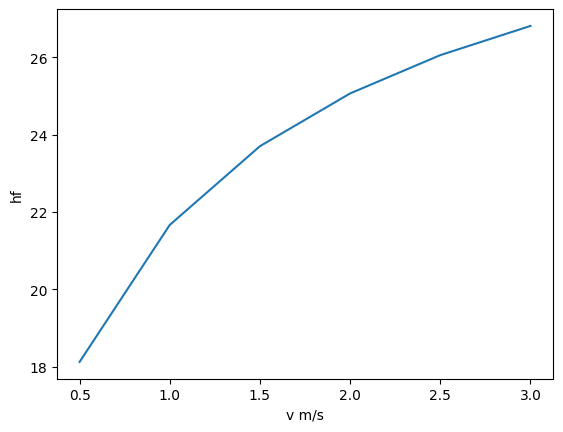

Text(0, 0.5, 'Rth')

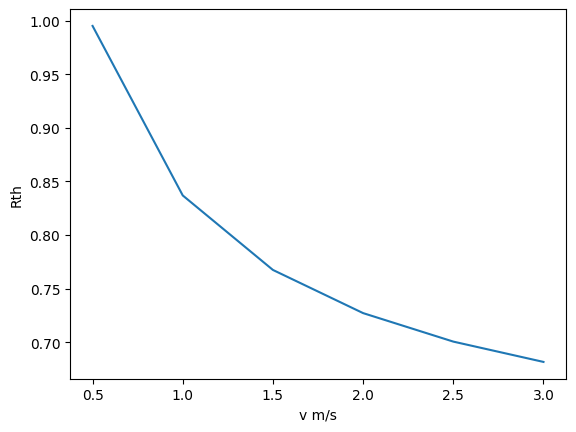

In [158]:
# Example geometry (mm) and air speed:
arrh= []
varr=np.arange(0.5,3.1,0.5)
Rarr=[]
for v in varr:
    W, s, t, H, b, L = 80, 3, 1.5, 25, 5, 60  # mm
    #v = 3.0  # m/s channel velocity
    result = plate_fin_heatsink_rth(W, s, t, H, b, L, v_air=v, speed_type="channel")
    hf= result['h_W_m2K']
    arrh.append(hf)
    R= result['R_total_K_per_W']
    Rarr.append(R)
    
plt.plot(varr, np.array(arrh))
plt.xlabel("v m/s")
plt.ylabel ("hf")
plt.show()
plt.plot(varr, np.array(Rarr))
plt.xlabel("v m/s")
plt.ylabel ("Rth")

It looks like I can’t generate the schematic image right now.  

But I can **describe the recommended fan placement and airflow direction** clearly:

### ✅ Typical Setup for Forced Convection Plate-Fin Heat Sink
- **Fan position:**  
  - **Push configuration (most common):** Fan is mounted at the **inlet side** of the heat sink, blowing air **through the fin channels** toward the outlet.  
  - **Pull configuration:** Fan is mounted at the **outlet side**, pulling air through the fins. This can reduce turbulence at the inlet but sometimes lowers static pressure capability.

- **Orientation:**  
  - Air should flow **along the fin length (L)**, not across the width (W). This ensures the air travels through the channels formed by the fins.

- **Why push is often preferred:**  
  - Fans generally perform better pushing into a restriction than pulling from it because the pressure rise occurs before the flow enters the channels.

---

Would you like me to:
✅ Make an **ASCII diagram** showing the heat sink and fan in push vs pull mode?  
✅ Or prepare a **detailed airflow schematic in a PDF** with arrows and labels that you can download?

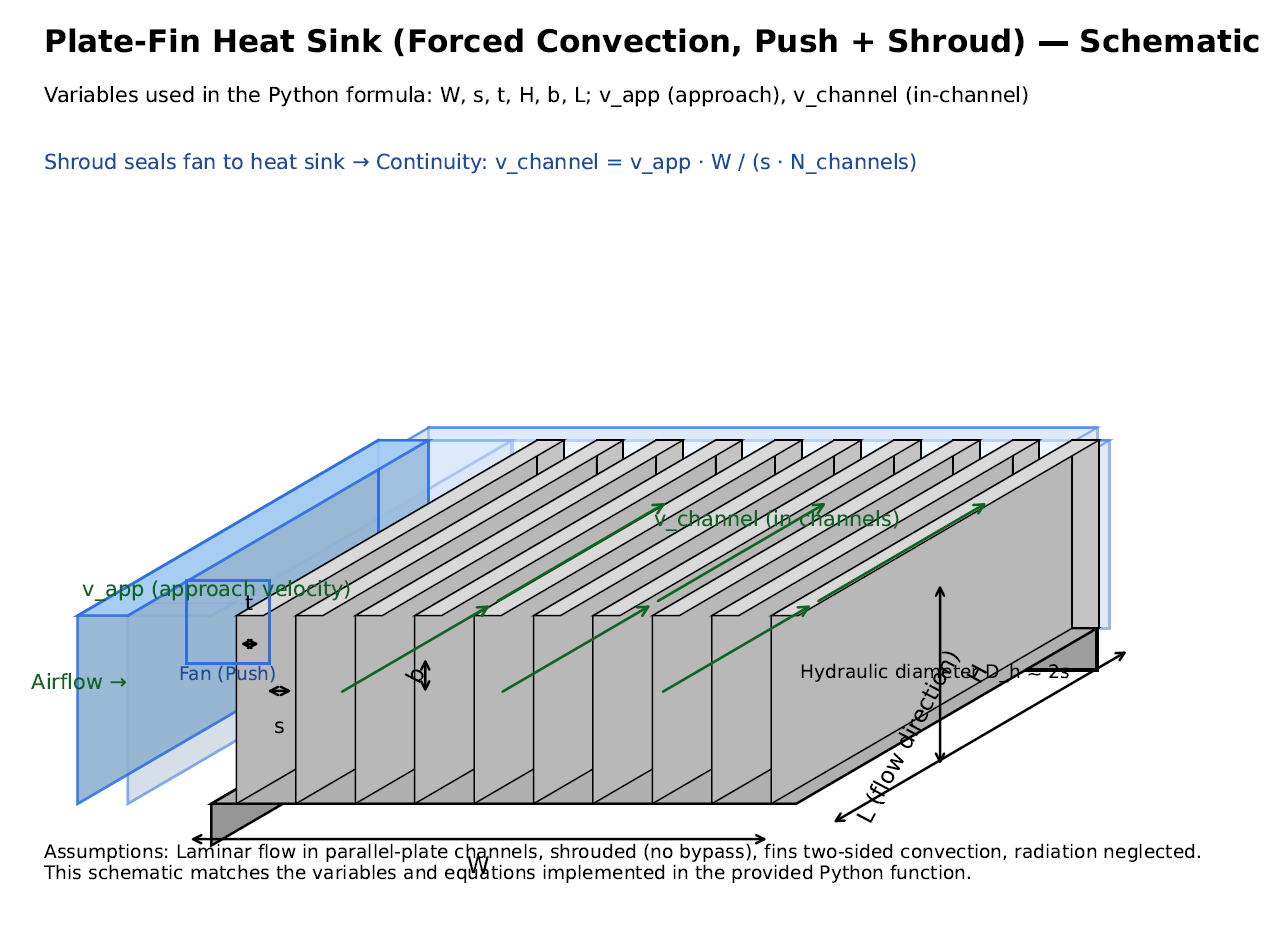